In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("german_credit_data.csv")
print(df.head())

   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB
None
               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000

In [6]:
# One-hot encoding for categorical variables
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Purpose']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

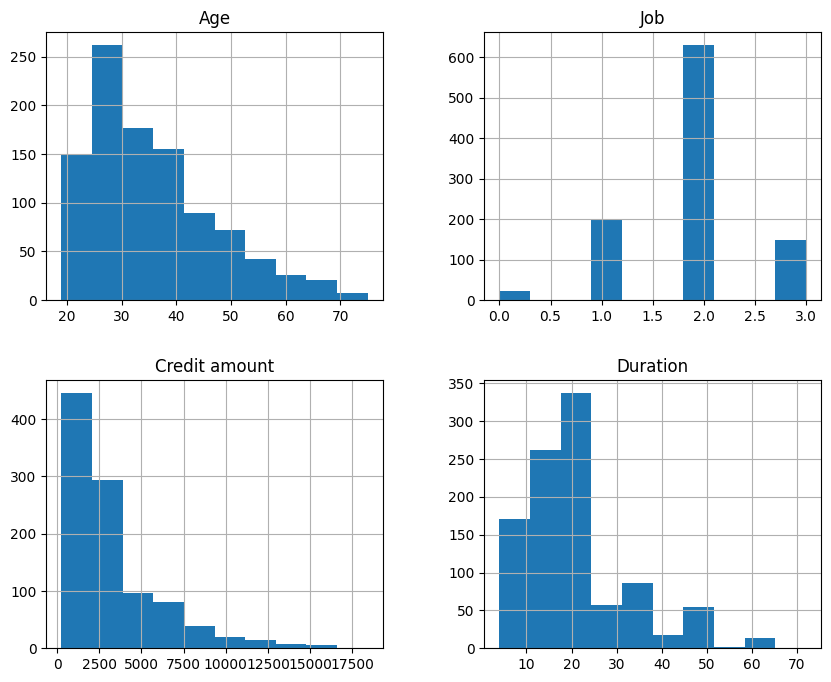

In [8]:
import matplotlib.pyplot as plt
# Visualize histograms of numerical features
numerical_cols = ['Age', 'Job', 'Credit amount', 'Duration']
df_encoded[numerical_cols].hist(figsize=(10, 8))
plt.show()

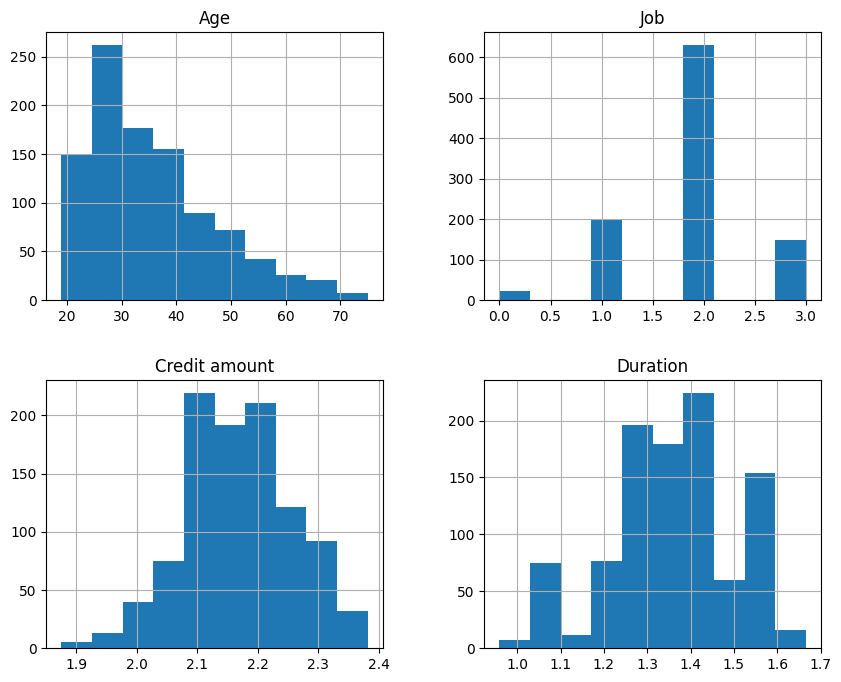

In [11]:
import numpy as np
# Check for skewness and apply log transformation if necessary
skewed_cols = ['Credit amount', 'Duration']
for col in skewed_cols:
    df_encoded[col] = np.log1p(df_encoded[col])


#Visualize histograms again after log transformation
df_encoded[numerical_cols].hist(figsize=(10, 8))
plt.show()

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Feature Scaling
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [15]:
from sklearn.cluster import KMeans

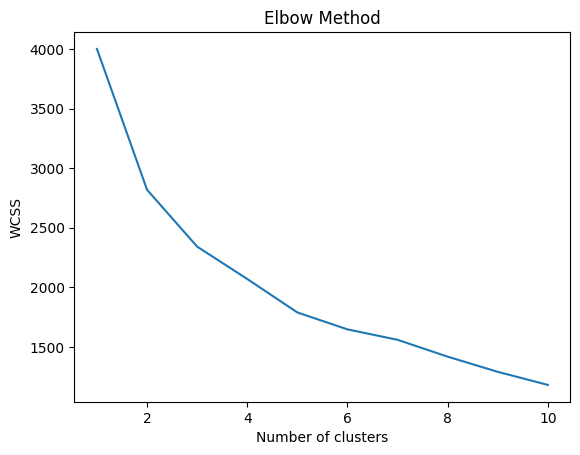

In [16]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_encoded[numerical_cols])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

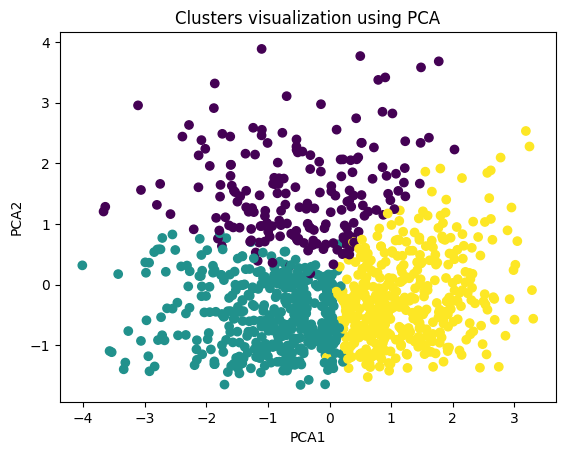

In [18]:
from sklearn.decomposition import PCA

# Implement KMeans Clustering and PCA
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_encoded[numerical_cols])

# Adding the cluster labels to the dataframe
df_encoded['Cluster'] = clusters

# Apply PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_encoded[numerical_cols])

# Visualize the clusters
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters visualization using PCA')
plt.show()


In [19]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score


In [20]:
# Implement KFold Cross-Validation
X = df_encoded.drop('Risk', axis=1) # Features
y = df_encoded['Risk'] # Target variable

kf = KFold(n_splits=5, random_state=42, shuffle=True)
classifier = LogisticRegression()

precision_scores = []
recall_scores = []
accuracy_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    precision_scores.append(precision_score(y_test, y_pred, pos_label='good'))
    recall_scores.append(recall_score(y_test, y_pred, pos_label='good'))
    accuracy_scores.append(accuracy_score(y_test, y_pred))

print(f'Precision: {np.mean(precision_scores)}')
print(f'Recall: {np.mean(recall_scores)}')
print(f'Accuracy: {np.mean(accuracy_scores)}')

ValueError: could not convert string to float: 'little'

   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-nul

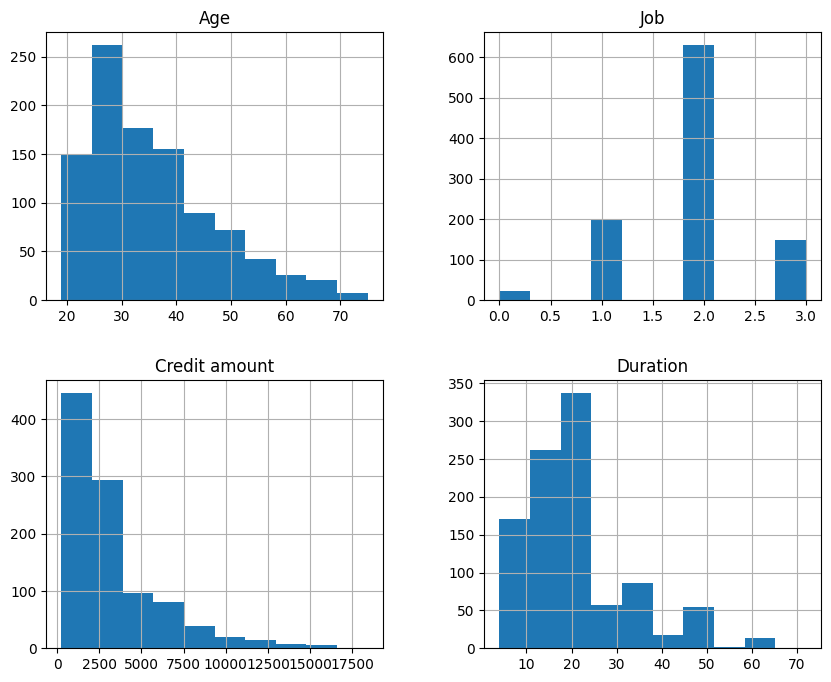

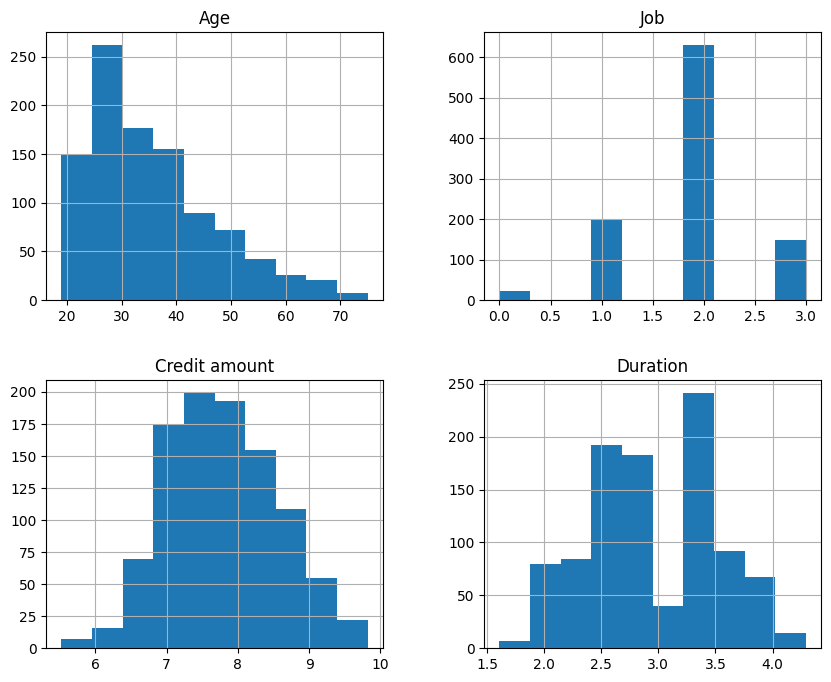

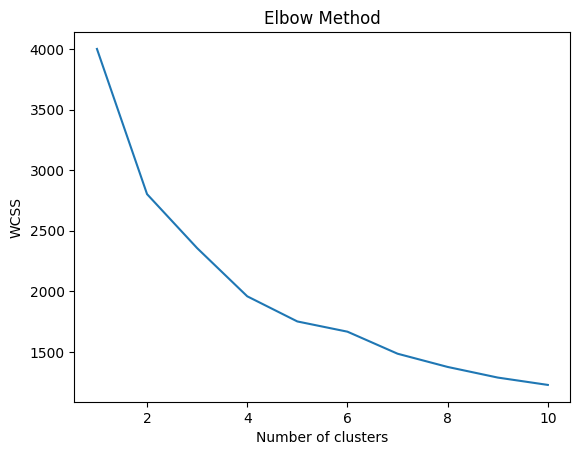

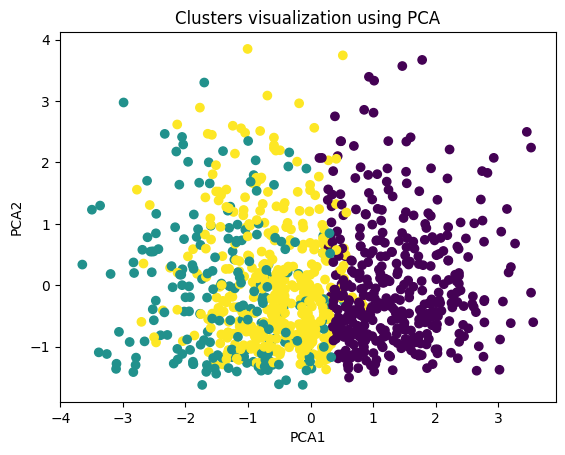

Precision: 0.7815153705595106
Recall: 0.8839422106256102
Accuracy: 0.746


In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Load the dataset
df = pd.read_csv("german_credit_data.csv") # Replace with the correct path to your dataset

# Display the first few rows of the dataset
print(df.head())

# Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())

# Handling missing values
df['Saving accounts'] = df['Saving accounts'].fillna('NA')
df['Checking account'] = df['Checking account'].fillna('NA')

# One-hot encoding for categorical variables
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Visualize histograms of numerical features
numerical_cols = ['Age', 'Job', 'Credit amount', 'Duration']
df_encoded[numerical_cols].hist(figsize=(10, 8))
plt.show()

# Check for skewness and apply log transformation if necessary
skewed_cols = ['Credit amount', 'Duration']
for col in skewed_cols:
    df_encoded[col] = np.log1p(df_encoded[col])

# Visualize histograms again after log transformation
df_encoded[numerical_cols].hist(figsize=(10, 8))
plt.show()

# Feature Scaling
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_encoded[numerical_cols])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Implement KMeans Clustering and PCA
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_encoded[numerical_cols])

# Adding the cluster labels to the dataframe
df_encoded['Cluster'] = clusters

# Apply PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_encoded[numerical_cols])

# Visualize the clusters
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters visualization using PCA')
plt.show()

# Implement KFold Cross-Validation
X = df_encoded.drop('Risk', axis=1) # Features
y = df_encoded['Risk'] # Target variable

kf = KFold(n_splits=5, random_state=42, shuffle=True)
classifier = LogisticRegression()

precision_scores = []
recall_scores = []
accuracy_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    precision_scores.append(precision_score(y_test, y_pred, pos_label='good'))
    recall_scores.append(recall_score(y_test, y_pred, pos_label='good'))
    accuracy_scores.append(accuracy_score(y_test, y_pred))

print(f'Precision: {np.mean(precision_scores)}')
print(f'Recall: {np.mean(recall_scores)}')
print(f'Accuracy: {np.mean(accuracy_scores)}')
